In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import tqdm

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
tf.set_random_seed(777)

In [4]:
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [6]:
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1]) #img 28 X 28 X 1 (Black & White) 
Y = tf.placeholder(tf.float32, [None, 10])

In [7]:
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01)) # 3 X 3 filter, 1 color, 32 fliters
# Conv  ->  (?, 28, 28, 32)
# Pool  ->  (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides = [1, 1, 1, 1], padding = 'SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME') # ksize : kernel size

In [8]:
# L2 imgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
# Conv  ->  (?, 14, 14, 64)
# Pool  ->  (?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides = [1, 1, 1, 1], padding = 'SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
# Pool  ->  (?, 7, 7, 64)
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])

In [9]:
# Final FC 7 X 7 X 64 inputs -> 10 outputs
W3 = tf.get_variable("W3", shape = [7 * 7 * 64, 10], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))

In [10]:
logits = tf.matmul(L2_flat, W3) + b

In [11]:
# define cost/loss & optimizer

In [12]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

In [13]:
#initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [14]:
#train model
print('Learning started... It takes sometime.')
for epoch in range(training_epochs) :
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in tqdm.tqdm_notebook(range(total_batch)) :
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict={X : batch_xs, Y : batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch', '%4d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Learning started... It takes sometime.


Epoch    1 cost = 0.345577185


Epoch    2 cost = 0.091736604


Epoch    3 cost = 0.068284046


Epoch    4 cost = 0.056339833


Epoch    5 cost = 0.047010720


Epoch    6 cost = 0.041194586


Epoch    7 cost = 0.036663712


Epoch    8 cost = 0.032757639


Epoch    9 cost = 0.027963868


Epoch   10 cost = 0.025047483


Epoch   11 cost = 0.022065875


Epoch   12 cost = 0.020263703


Epoch   13 cost = 0.016754853


Epoch   14 cost = 0.015507657


Epoch   15 cost = 0.013157484

Learning finished


In [15]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.9883


In [16]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label : ", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print("Prediction : ", sess.run(tf.argmax(logits, 1), feed_dict={X : mnist.test.images[r:r+1]}))

Label :  [5]
Prediction :  [5]


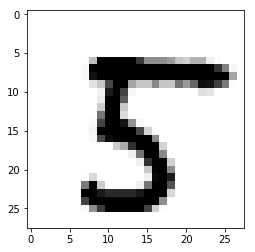

In [17]:
# get images\
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation = 'nearest')
plt.show()